Resolução do Data Challenge 20221121 

# **Conhecendo os datasets**

In [59]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

Amazon

In [60]:
amazon = pd.read_csv ('/content/amazon_prime_titles.csv')


In [61]:
amazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [62]:
amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [63]:
#somando a quantidade de valores nulos
amazon.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

**Algumas transformações nos dados:**

In [64]:
#olhando para os valores nulos

for i in amazon.columns:
    null_rate = amazon[i].isna().sum() / len(amazon) * 100 
    if null_rate > 0 :
        print("{} valores nulo= {}%".format(i,round(null_rate,2)))

director valores nulo= 21.53%
cast valores nulo= 12.75%
country valores nulo= 93.05%
date_added valores nulo= 98.4%
rating valores nulo= 3.49%


In [87]:
# Alterando algumas colunas para tratar os valores

amazon['director'].replace(np.nan, 'No Data',inplace  = True)

#removendo valores duplicados
amazon.drop_duplicates(inplace= True)

In [67]:
amazon.isnull().sum()

show_id            0
type               0
title              0
director           0
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

Alterações na data: criando novas colunas para conseguir tratar o mês separadamente

In [68]:
amazon["date_added"] = pd.to_datetime(amazon['date_added'])

amazon['month_added']=amazon['date_added'].dt.month
amazon['month_name_added']=amazon['date_added'].dt.month_name()
amazon['year_added'] = amazon['date_added'].dt.year

In [69]:
amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,3.0,March,2021.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,3.0,March,2021.0
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,3.0,March,2021.0
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",3.0,March,2021.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,3.0,March,2021.0


**Netflix**
- Realizado o mesmo tratamento de dados do dataset da Amazon

In [70]:
netflix = pd.read_csv ('/content/netflix_titles.csv')

In [71]:
for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    if null_rate > 0 :
        print("{} valores nulo= {}%".format(i,round(null_rate,2)))

director valores nulo= 29.91%
cast valores nulo= 9.37%
country valores nulo= 9.44%
date_added valores nulo= 0.11%
rating valores nulo= 0.05%
duration valores nulo= 0.03%


In [72]:
#netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['director'].replace(np.nan, 'No Data',inplace  = True)
netflix.drop_duplicates(inplace= True)

In [73]:
netflix.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [74]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])

netflix['month_added']=netflix['date_added'].dt.month
netflix['month_name_added']=netflix['date_added'].dt.month_name()
netflix['year_added'] = netflix['date_added'].dt.year

In [75]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,No Data,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0


**Mesclar os modelos**

Escolhi o método concat para que os identificadores não sobreponham valores.

In [76]:
shows = pd.concat([amazon, netflix],  keys= ["amazon", "netflix"])

In [133]:
display(shows)

show_id     type                 title         director  \
amazon  0         s1    Movie   The Grand Seduction     Don McKellar   
        1         s2    Movie  Take Care Good Night     Girish Joshi   
        2         s3    Movie  Secrets of Deception      Josh Webber   
        3         s4    Movie    Pink: Staying True   Sonia Anderson   
        4         s5    Movie         Monster Maker     Giles Foster   
...              ...      ...                   ...              ...   
netflix 8802   s8803    Movie                Zodiac    David Fincher   
        8803   s8804  TV Show           Zombie Dumb          No Data   
        8804   s8805    Movie            Zombieland  Ruben Fleischer   
        8805   s8806    Movie                  Zoom     Peter Hewitt   
        8806   s8807    Movie                Zubaan      Mozez Singh   

                                                           cast  \
amazon  0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   
        1      Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   
        2     Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   
        3     Interviews with: Pink, Adele, Beyoncé, Britney...   
        4     Harry Dean Stanton, Kieran O'Brien, George Cos...   
...                                                         ...   
netflix 8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
        8803                                  No Cast Specified   
        8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
        8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
        8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                     country date_added  release_year rating   duration  \
amazon  0             Canada 2021-03-30          2014    NaN    113 min   
        1              India 2021-03-30          2018    13+    110 min   
        2      United States 2021-03-30          2017    NaN     74 min   
        3      United States 2021-03-30          2014    NaN     69 min   
        4     United Kingdom 2021-03-30          1989    NaN     45 min   
...                      ...        ...           ...    ...        ...   
netflix 8802   United States 2019-11-20          2007      R    158 min   
        8803             NaN 2019-07-01          2018  TV-Y7  2 Seasons   
        8804   United States 2019-11-01          2009      R     88 min   
        8805   United States 2020-01-11          2006     PG     88 min   
        8806           India 2019-03-02          2015  TV-14    111 min   

                                                   listed_in  \
amazon  0                                      Comedy, Drama   
        1                               Drama, International   
        2                            Action, Drama, Suspense   
        3                                        Documentary   
        4                                     Drama, Fantasy   
...                                                      ...   
netflix 8802                  Cult Movies, Dramas, Thrillers   
        8803          Kids' TV, Korean TV Shows, TV Comedies   
        8804                         Comedies, Horror Movies   
        8805              Children & Family Movies, Comedies   
        8806  Dramas, International Movies, Music & Musicals   

                                                    description  month_added  \
amazon  0     A small fishing village must procure a local d...          3.0   
        1     A Metro Family decides to fight a Cyber Crimin...          3.0   
        2     After a man discovers his wife is cheating on ...          3.0   
        3     Pink breaks the mold once again, bringing her ...          3.0   
        4     Teenage Matt Banting wants to work with a famo...          3.0   
...                                                         ...          ...   
netflix 8802  A political cartoonist, a crime reporter and a...         11.0   
        8803  While living alone 

# **Resolução do desafio**

**1- Top 10 atores/atrizes considerando todos os dados;**



1.   Brendan Gleeson
2.   Taylor Kitsch
3. Gordon Pinsent
4. Mahesh Manjrekar
5. Abhay Mahajan
6. Manish Chaudhary
7. Meghna Malik
8. Malkeet Rauni
9. Anita Shabdish
10. Chittaranjan Tripathy



In [126]:
top_actors = pd.DataFrame(shows.cast.str.split(',').tolist(), index=shows.type).stack()
top_actors = top_actors.reset_index([0, 'type'])
top_actors.columns = ['type', 'actor']

In [131]:
top_actors

,type,actor
0,Movie,Brendan Gleeson
1,Movie,Taylor Kitsch
2,Movie,Gordon Pinsent
3,Movie,Mahesh Manjrekar
4,Movie,Abhay Mahajan
...,...,...
110546,Movie,Manish Chaudhary
110547,Movie,Meghna Malik
110548,Movie,Malkeet Rauni
110549,Movie,Anita Shabdish


**2- Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas;**

Todos os dados: 
- Estados Unidos
- India
- Reino Unido
- Japão
- Coreia do Sul

In [77]:
shows['country'].value_counts()

United States                    3071
India                            1201
United Kingdom                    447
Japan                             247
South Korea                       199
                                 ... 
Japan, France                       1
Finland, Germany, Belgium           1
Denmark, France                     1
United States, Germany, Italy       1
United Arab Emirates, Jordan        1
Name: country, Length: 783, dtype: int64

Comparando as duas plataformas:

Amazon: 
- Estados Unidos
- India
- Reino Unido
- Canadá

Netflix: 
- Estados Unidos
- India
- Reino Unido
- Japão
- Coreia do Sul

In [78]:
amazon['country'].value_counts()

United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: country, Length: 86, dtype: int64

In [79]:
netflix['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

**3- Mês no qual há mais adições de filmes na plataforma Netflix;**

- Julho

In [80]:
netflix['month_name_added'].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month_name_added, dtype: int64

**4- Quantidade de filmes listados como comédia.**

536 filmes listados como comédia


In [81]:
comedia = shows.loc[shows['listed_in'] =='Comedy']

In [82]:
display(comedia)

show_id   type                      title  \
amazon 7         s8  Movie               Grease Live!   
       11       s12  Movie                  Take Care   
       81       s82  Movie          Woke Up Like This   
       110     s111  Movie       Who Killed Doc Robin   
       127     s128  Movie            WHATEVER FATHER   
...             ...    ...                        ...   
       9640   s9641  Movie  Meet the Spartans (Uncut)   
       9649   s9650  Movie                       Jack   
       9653   s9654  Movie  Date Night (Extended Cut)   
       9660   s9661  Movie         The Man in the Hat   
       9663   s9664  Movie        Pride Of The Bowery   

                                        director  \
amazon 7             Thomas Kail, Alex Rudzinski   
       11                           Liz Tuccillo   
       81                     John Elbert Ferrer   
       110                          Bernard Carr   
       127                     Harold Trompetero   
...                                          ...   
       9640        Jason Friedberg, Aaron Setzer   
       9649                 Francis Ford Coppola   
       9653                           Shawn Levy   
       9660  John-Paul Davidson, Stephen Warbeck   
       9663                      Joseph H. Lewis   

                                                          cast        country  \
amazon 7     Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...  United States   
       11              Leslie Bibb, Kevin Curtis, Nadia Dajani  United States   
       81                              Vhong Navarro, Lovi Poe            NaN   
       110                                                 NaN            NaN   
       127               Hassam, Carlos Ramírez, Bebsabe Duque            NaN   
...                                                        ...            ...   
       9640  Sean Maguire, Carmen Electra, Ken Davitian, Ke...            NaN   
       9649  Robin Williams, Diane Lane, Brian Kerwin, Jenn...            NaN   
       9653  Mark Wahlberg, Steve Carell, Taraji P. Henson,...            NaN   
       9660             Ciaran Hinds, Stephen Dillane, Maïwenn            NaN   
       9663                           Leo Gorcey, Bobby Jordan            NaN   

            date_added  release_year   rating duration listed_in  \
amazon 7    2021-03-30          2016      NaN  131 min    Comedy   
       11   2021-04-10          2014      NaN   93 min    Comedy   
       81          NaT          2017      13+  104 min    Comedy   
       110         NaT          1948       NR   52 min    Comedy   
       127         NaT          2018      ALL  102 min    Comedy   
...                ...           ...      ...      ...       ...   
       9640        NaT          2008      18+   86 min    Comedy   
       9649        NaT          1996    PG-13  113 min    Comedy   
       9653        NaT          2010  UNRATED  102 min    Comedy   
       9660        NaT          2021      13+   96 min    Comedy   
       9663        NaT          1940       7+   60 min    Comedy   

                                                   description  month_added  \
amazon 7     This honest, uncompromising comedy chronicles ...          3.0   
       11    When a car crash leaves Frannie immobilized, s...          4.0   
       81    A story about Nando, who's a dutiful son and b...          NaN   
       110   A group of people find themselves trapped in a...          NaN   
       127   Matias, a 10-year-old runs away from home in a...          NaN   
...                                                        ...          ...   
       9640  From the creators of Scary Movie and Date Movi...          NaN   
       9649  Robin Williams stars as a 10-year-old in a gro...          NaN   
       9653  A typical suburban couple's date night becomes...          NaN   
       9660  The Man in the Hat journeys through France in ...          NaN   
       9663  New York City street principle

**5- Lista de todos os gêneros de filmes.**

Drama,filmes internacionais , comédias, ação, suspense, crianças, documentário, horror, ação e aventura, filmes independetes, romance, filmes para crianças e famílias, filmes românticos.



In [134]:

shows['genre'] = shows['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
key_value = {}  # key - genre, value - number of content 
for g1 in shows['genre']:
    for g2 in g1:
        if g2 not in key_value:
            key_value[g2] = 0
        key_value[g2] += 1

shows_upd = pd.DataFrame(data=list(zip(key_value.keys(), key_value.values())),
                      columns=['genre', 'Number of content']).sort_values('Number of content',
                                                                          ascending=False)[0:20]

fig = px.bar(shows_upd,
             x='genre',
             y="Number of content",
             title="Gêneros de filmes",
             )


fig.update_layout(
    autosize=False,
    width=950,
    height=500,
    xaxis_title="Gênero",
    yaxis_title="Quantidade",
    )
fig.show()

6.   **A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas**


*  TV Show Amazon: 19.2%
*   TV Show Netflix: 30.4%
* TV Show comparativamente: 24.5%

7.   **A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas**


*   Movies Amazon: 80.8%
*   Movies Netflix: 69.9%
* Movies comparativamente: 75.5%



Text(0.5, 1.0, 'Frequência Amazon para Movie/TV Show')

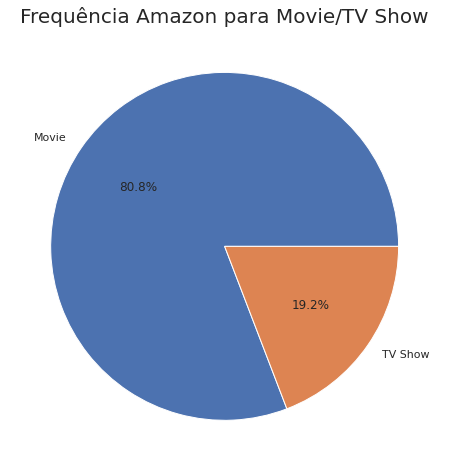

In [136]:
bar, ax = plt.subplots(figsize = (8,8))
plt.pie(amazon['type'].value_counts(), labels = amazon['type'].value_counts().index,autopct="%.1f%%")
plt.title('Frequência Amazon para Movie/TV Show', size=20)

Text(0.5, 1.0, 'Frequência Netflix para Movie/TV Show')

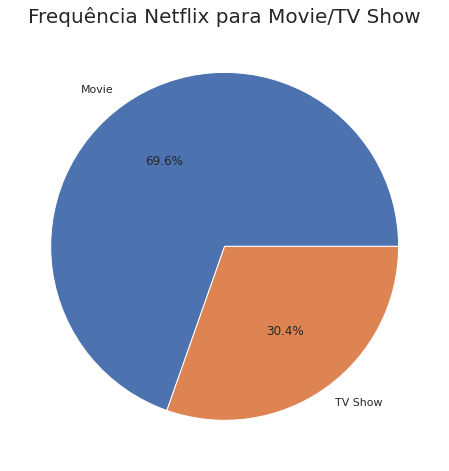

In [137]:
bar, ax = plt.subplots(figsize = (8,8))
plt.pie(netflix['type'].value_counts(), labels = netflix['type'].value_counts().index, autopct="%.1f%%")
plt.title('Frequência Netflix para Movie/TV Show', size=20)

Text(0.5, 1.0, 'Distribuição comparada para Movie/TV Show')

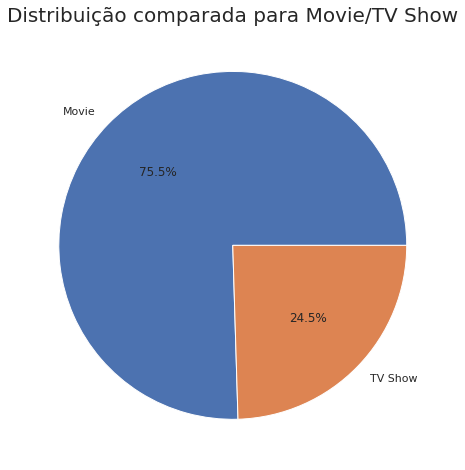

In [138]:
bar, ax = plt.subplots(figsize = (8,8))
plt.pie(shows['type'].value_counts(), labels = shows['type'].value_counts().index, autopct="%.1f%%")
plt.title('Distribuição comparada para Movie/TV Show', size=20)